# $$Supply~Chain ~Analytics:$$

### $$Conceito:$$


**A Supply Chain (Cadeia de Suprimentos) abraça todos os processos que um produto passa desde a captação de matérias-primas até a entrega para o consumidor final. São os métodos e operações que compõem a fabricação, logística e distribuição, ou seja, a lógica que envolve todos os setores de um segmento e que afetem diretamente na entrega de um produto ou serviço ao cliente**

### $$Logistica ~~ VS~ ~Supply~ Chain:$$


**Logística:** Concentra seus esforços no transporte da mercadoria e em todo o suporte para que isso ocorra

**Supply chain:** Visão mais ampla, planejando todo o fluxo do produto e sua relação com o negócio e os clientes.


### $$Vantagens~ da~Supply~ Chain:$$


**Supply chain pode resultar em vários benefícios práticos para a empresa e ao consumidor. Conheça as principais vantagens:**

- Redução de Custos
- Maior Eficiência
- Integração Entre os Setores
- Maior Competitividade
- Aumento dos Lucros
- Aprimoramento dos Serviços


### $$Quais~ Áreas~Fazem~Integração~com~Supply~ Chain:$$

- Pessoas
- Insumos
- Transporte
- Documentação
- Custos
- Organização
- Equipamentos


### $$Supply~ Chain:~5~práticas~para~otimizar~a~ gestão:$$

- Utilize um sistema de gestão eficiente
- Sincronize os dados com os fornecedores da empresa
- Faça com que toda a equipe esteja envolvida nos processos
- Análise dos indicadores internos e externos
- Análise de demandas e despesas

In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



## $$1°- Objetivo:$$  

## $$Previsão~ de~ demanda~ dos~ produtos~ para ~os ~proximos~ 5~ meses$$

# Base de Dados 

In [2]:
# Carrega os dados
dados = pd.read_csv("dados/DataCoSupplyChainDataset.csv", encoding = 'latin1')
dados.head(21)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,PAYMENT,5,2,-246.360001,321.200012,Late delivery,1,73,Sporting Goods,Canovanas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 7:12,Second Class
17,CASH,2,1,23.840000,317.920013,Late delivery,1,73,Sporting Goods,Paramount,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 6:51,First Class
18,DEBIT,2,1,102.260002,314.640015,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 6:30,First Class
19,PAYMENT,0,0,87.180000,311.359985,Shipping on time,0,73,Sporting Goods,Mount Prospect,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/13/2018 18:09,Same Day


In [3]:
#Shape
dados.shape

(180519, 53)

**Dataset contém 180.519 registros e 53 variáveis.**

In [4]:
# Selecionar as variáveis para o 1° objetivo

demand = dados[['order date (DateOrders)',
                'Order Id','Product Price']]
demand.head(3)

,order date (DateOrders),Order Id,Product Price
0,1/31/2018 22:56,77202,327.75
1,1/13/2018 12:27,75939,327.75
2,1/13/2018 12:06,75938,327.75


**Variaveis selecionadas para o objetivo proposto**

# Dicionário de Dados das variáveis Selecionadas

### **$$Variáveis:$$**

- **order date (DateOrders):** Data que foi processado o pedido


- **Order Id:** Numero da Ordem do Pedido

    
- **Product Price:** Preço do produto

# Análise Exploratória

In [5]:
# Tipos de dados das colunas
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order date (DateOrders)  180519 non-null  object 
 1   Order Id                 180519 non-null  int64  
 2   Product Price            180519 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.1+ MB


**Note que a variável 'order date' precisa ser transformada para o type Datetime**

In [6]:
# Função para extrair somente os primeiros numeros da variável
def extrai_data(x):
    return x[:9]

# Extrai ano e mês da coluna de data
demand['order date (DateOrders)'] = demand['order date (DateOrders)'].apply(extrai_data)
demand

,order date (DateOrders),Order Id,Product Price
0,1/31/2018,77202,327.750000
1,1/13/2018,75939,327.750000
2,1/13/2018,75938,327.750000
3,1/13/2018,75937,327.750000
4,1/13/2018,75936,327.750000
...,...,...,...
180514,1/16/2016,26043,399.980011
180515,1/16/2016,26037,399.980011
180516,1/15/2016,26024,399.980011
180517,1/15/2016,26022,399.980011


**Função para filtrar apenas os 9 primeiros digitos, que correspondem ao ano, mês e dia**

In [7]:
# Transforamar a coluna de data Str em Datetime
demand['order date (DateOrders)']= pd.to_datetime(demand['order date (DateOrders)'], errors = 'coerce')
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order date (DateOrders)  153549 non-null  datetime64[ns]
 1   Order Id                 180519 non-null  int64         
 2   Product Price            180519 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.1 MB


**Variável 'order date (DateOrders)' transformado no type datetime**

In [8]:
#Data de inicio e fim do pedido
a = demand['order date (DateOrders)'].min()
b = demand['order date (DateOrders)'].max()
print('                 Data:\n')
print(f'Data de inicio: {a}\n')
print(f'Data do Fim:    {b}')

                 Data:

Data de inicio: 2015-01-01 00:00:00

Data do Fim:    2018-01-31 00:00:00


In [9]:
#Quantidade de pedido
a =len(demand['Order Id'].unique())

print(f'Quantidade de pedido de todo periodo: {a}')


Quantidade de pedido de todo periodo: 65752


In [10]:
# Agrupar os dados por data
data_pedido = demand.groupby(['order date (DateOrders)']).sum().reset_index()
data_pedido

,order date (DateOrders),Order Id,Product Price
0,2015-01-01,5486,23117.000611
1,2015-01-02,16163,19101.200493
2,2015-01-03,30712,24519.850592
3,2015-01-04,45946,23611.930567
4,2015-01-05,49401,19401.090491
...,...,...,...
927,2018-01-27,5228962,14675.760496
928,2018-01-28,5310585,14891.580504
929,2018-01-29,5238278,14675.760496
930,2018-01-30,5320038,14891.580504


**Note que o dataset está organizado por data em ordem crescente**

# Plot de vendas de cada ano

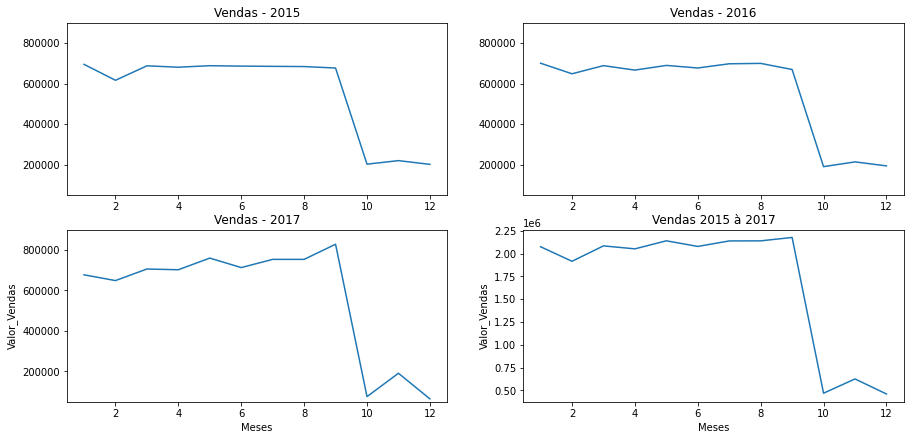

In [11]:
# Agrupar os dados por Mês de 2015
mes_ano = (data_pedido['order date (DateOrders)'] >= '2015-01-01') & (data_pedido['order date (DateOrders)'] <= '2015-12-31')
mes_ano = data_pedido[mes_ano]
mes_ano = pd.DataFrame(mes_ano.groupby(mes_ano['order date (DateOrders)'].dt.month)['Product Price'].sum())


# Agrupar os dados por Mês de 2016
mes_ano1 = (data_pedido['order date (DateOrders)'] >= '2016-01-01') & (data_pedido['order date (DateOrders)'] <= '2016-12-31')
mes_ano1 = data_pedido[mes_ano1]
mes_ano1 = pd.DataFrame(mes_ano1.groupby(mes_ano1['order date (DateOrders)'].dt.month)['Product Price'].sum())


# Agrupar os dados por Mês de 2017
mes_ano2 = (data_pedido['order date (DateOrders)'] >= '2017-01-01') & (data_pedido['order date (DateOrders)'] <= '2017-12-31')
mes_ano2 = data_pedido[mes_ano2]
mes_ano2 = pd.DataFrame(mes_ano2.groupby(mes_ano2['order date (DateOrders)'].dt.month)['Product Price'].sum())


# Agrupar os dados por Mês de 2015 a 2017
mes_ano3 = (data_pedido['order date (DateOrders)'] >= '2015-01-01') & (data_pedido['order date (DateOrders)'] <= '2017-12-31')
mes_ano3 = data_pedido[mes_ano3]
mes_ano3 = pd.DataFrame(mes_ano3.groupby(mes_ano3['order date (DateOrders)'].dt.month)['Product Price'].sum())






plt.figure(figsize = (15, 8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.5, wspace=None, hspace=None)

#Plot dos dados por Mês de 2015
plt.subplot(4, 2, 1)
plt.title('Vendas - 2015')
plt.plot(mes_ano.index,mes_ano['Product Price']);
plt.ylim(50000, 900000)

#Plot dos dados por Mês de 2016
plt.subplot(4, 2, 2)
plt.title('Vendas - 2016')
plt.plot(mes_ano.index,mes_ano1['Product Price'])
plt.ylim(50000, 900000)

#Plot dos dados por Mês de 2017
plt.subplot(4, 2, 3)
plt.title('Vendas - 2017')
plt.plot(mes_ano.index,mes_ano2['Product Price'])
plt.xlabel('Meses')
plt.ylabel('Valor_Vendas');
plt.ylim(50000, 900000)

#Plot dos dados dos 12 Meses de 2015 a 2017
plt.subplot(4, 2, 4)
plt.title('Vendas 2015 à 2017')
plt.plot(mes_ano.index,mes_ano3['Product Price']);
plt.xlabel('Meses')
plt.ylabel('Valor_Vendas');


**Note que em todos os anos as vendas seguem o mesmo padrão**

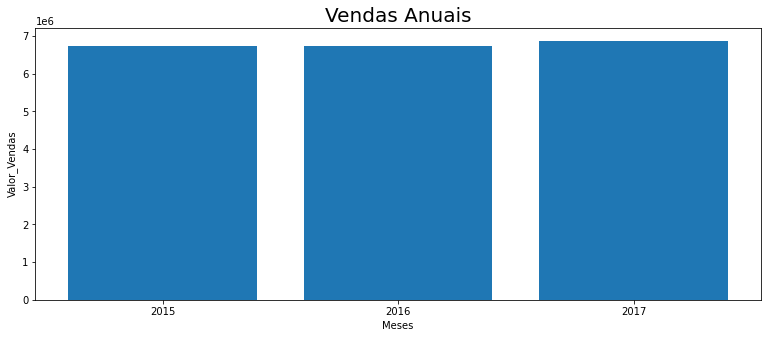

In [12]:
# Agrupar os dados por Ano
ano = (data_pedido['order date (DateOrders)'] >= '2015-01-01') & (data_pedido['order date (DateOrders)'] <= '2017-12-31')
ano = data_pedido[ano]
ano = pd.DataFrame(ano.groupby(ano['order date (DateOrders)'].dt.year)['Product Price'].sum()).reset_index()


plt.figure(figsize=(13, 5))
plt.bar(ano['order date (DateOrders)'],ano['Product Price'])
plt.xlabel('Meses')
plt.ylabel('Valor_Vendas');
plt.xticks([2015, 2016, 2017]);
plt.title('Vendas Anuais',fontsize=20);

**Dos 3 anos de registros coletados não houve nenhuma diferença no volume de vendas**

# Plot de vendas de cada mês

In [13]:
#Agrupar as vendas por mês:

#Ano 2015
mes_ano_15 = (data_pedido['order date (DateOrders)'] >= '2015-01-01') & (data_pedido['order date (DateOrders)'] <= '2015-12-31')
mes_ano_15 = data_pedido[mes_ano_15]
mes_ano_15 = pd.DataFrame(mes_ano_15.groupby(mes_ano_15['order date (DateOrders)'].dt.month)['Product Price'].sum()).reset_index()
mes_ano_15

#Ano 2016
mes_ano_16 = (data_pedido['order date (DateOrders)'] >= '2016-01-01') & (data_pedido['order date (DateOrders)'] <= '2016-12-31')
mes_ano_16 = data_pedido[mes_ano_16]
mes_ano_16 = pd.DataFrame(mes_ano_16.groupby(mes_ano_16['order date (DateOrders)'].dt.month)['Product Price'].sum()).reset_index()
mes_ano_16['order date (DateOrders)'] = range(13,25)

#Ano 2017
mes_ano_17 = (data_pedido['order date (DateOrders)'] >= '2016-01-01') & (data_pedido['order date (DateOrders)'] <= '2016-12-31')
mes_ano_17 = data_pedido[mes_ano_17]
mes_ano_17 = pd.DataFrame(mes_ano_17.groupby(mes_ano_17['order date (DateOrders)'].dt.month)['Product Price'].sum()).reset_index()
mes_ano_17['order date (DateOrders)'] = range(25,37)

#Juntar os Anos em 1 só dataframe
total = pd.concat([mes_ano_15, mes_ano_16])
total = pd.concat([total, mes_ano_17]).reset_index()
total =total.iloc[:,1:].set_index('order date (DateOrders)')
total = round(total)
total

,Product Price
order date (DateOrders),
1,695936.0
2,617255.0
3,688675.0
4,681826.0
5,689258.0
...,...
32,700684.0
33,670545.0
34,190938.0


**Agrupamos os dados pelos ultimos 3 anos corridos (2015, 2016 e 2017), pois o ano 2018 houve registro só no mês de janeiro**

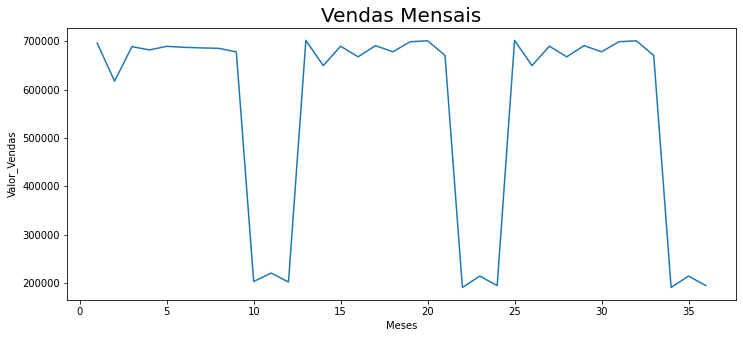

In [14]:
#Plotar o grafico das vendas por mês
plt.figure(figsize=(12, 5))
plt.plot(total);
plt.title('Vendas Mensais',fontsize=20);
plt.xlabel('Meses')
plt.ylabel('Valor_Vendas');

**Observe que temos sazonalidade e os dados segue um padrão durante os anos, de janeiro a setembro é o maior período de vendas, já os meses de outubro, novembro e dezembro as vendas despencam**

# Estacionariedade da Série

In [15]:
#Teste de estacionariedade dos dados
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)


adf_test(data_pedido.iloc[:,2])

Results of Dickey-Fuller Test:
Test Statistic                  -1.066765
p-value                          0.728142
#Lags Used                      17.000000
Number of Observations Used    914.000000
Critical Value (1%)             -3.437525
Critical Value (5%)             -2.864707
Critical Value (10%)            -2.568457
dtype: float64


**O Valor-p é maior que 0.05. Não temos evidências para rejeitar a hipótese nula de que a série não é estacionária**

## Aplicar transformação para deixar a série estacionária

- Aplicar Log e Diferenciação

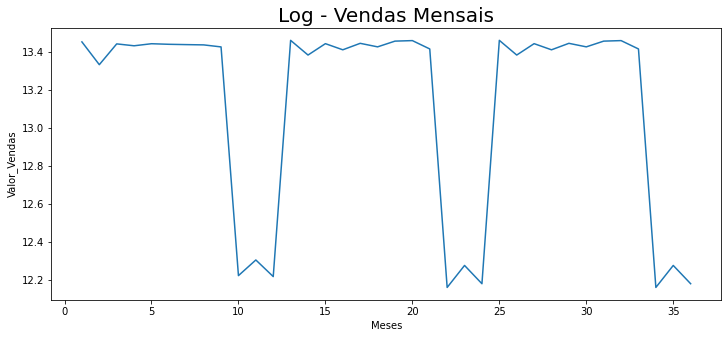

In [16]:
#Log
plt.figure(figsize=(12, 5))
total['Log']= np.log(total['Product Price'])
plt.plot(total.Log)
plt.title('Log - Vendas Mensais',fontsize=20);
plt.xlabel('Meses')
plt.ylabel('Valor_Vendas');

**Aplicar o log para diminuir o valor da escala dos dados e aproximar de uma distribuição normal**

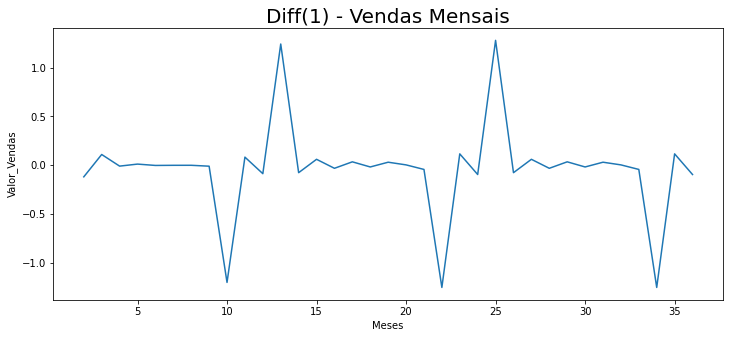

In [17]:
# Aplicar 1 diferenciação (defasagem)
plt.figure(figsize=(12, 5))
total['Diff_1'] = pd.DataFrame(total.Log).diff(1)
plt.plot(total['Diff_1'])
plt.title('Diff(1) - Vendas Mensais',fontsize=20);
plt.xlabel('Meses')
plt.ylabel('Valor_Vendas');

**Aplicado 1 diferenciação nos dados**

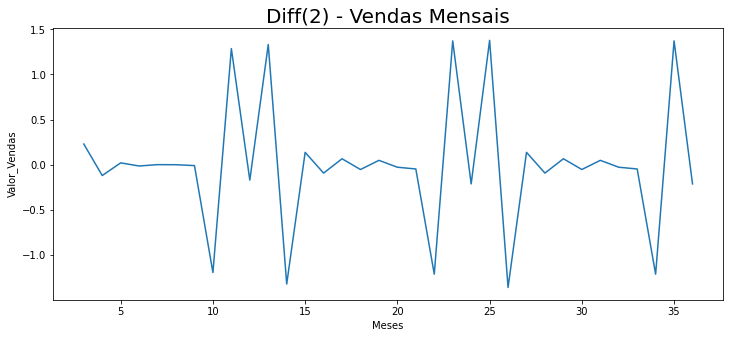

In [18]:
#Aplicar 2 diferenciações
plt.figure(figsize=(12, 5))
total['Diff_2'] = pd.DataFrame(total.Diff_1).diff(1)
plt.plot(total['Diff_2'])
plt.title('Diff(2) - Vendas Mensais',fontsize=20);
plt.xlabel('Meses')
plt.ylabel('Valor_Vendas');

**Aplicado 2° diferenciação nos dados**

In [19]:
#Teste de estacionariedade

##Eliminar os NaN provocado pelas diferenciações nos dados
total1 = total.iloc[2:,:]
total2 = total.iloc[3:,:]

a = adfuller(data_pedido.iloc[:,2])[1]
b = adfuller(total1.Diff_1)[1]
c = adfuller(total2.Diff_2)[1]
print(f'Serie Original: {a}')
print(f'Serie com 1 Diferenciação: {b}')
print(f'Serie com 2 Diferenciações: {c}')

Serie Original: 0.7281422612416873
Serie com 1 Diferenciação: 2.2013702225319913e-30
Serie com 2 Diferenciações: 0.0


**Observe que tanto a série com 1 ou 2 diferenciações são estacionarias**

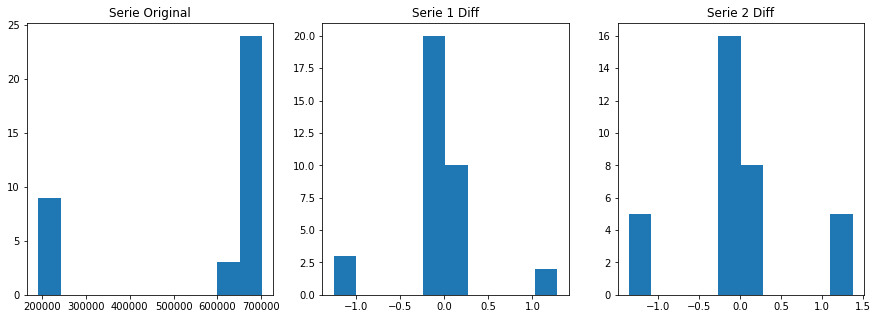

In [20]:
#Verificar a distribuição dos dados
fig,axes = plt.subplots(nrows =1,ncols=3,figsize=(15,5))

axes[0].hist(total['Product Price'])
axes[1].hist(total.Diff_1);
axes[2].hist(total.Diff_2);
axes[0].set_title('Serie Original');
axes[1].set_title('Serie 1 Diff');
axes[2].set_title('Serie 2 Diff');

In [21]:
from scipy import stats
shapiro_test0,a = stats.shapiro(total['Product Price'])
shapiro_test1,b = stats.shapiro(total['Diff_1'])
shapiro_test2,c = stats.shapiro(total['Diff_2'])

print(f'Serie Original: {a}')
print(f'Serie com 1 Diferenciação: {b}')
print(f'Serie com 2 Diferenciações: {c}')

Serie Original: 1.2493797107993032e-08
Serie com 1 Diferenciação: 1.0
Serie com 2 Diferenciações: 1.0


**Os dados com diferenciação segue uma distribuição normal, que é um dos requisitos para fazer previsões em séries temporais**

**OBS: Agora que sabemos que os dados podem ser estacionários, vamos criar alguns modelos e verificar os melhores hiperparâmetros**

# Modelagem

## Modelo 1 - SARIMA - Otimização dos parâmetros

In [22]:
#Modelo SARIMA 
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Otimização dos parâmetros
p = [0,1,2]
d = [0,1]
q = [0,1,2]
P = [0,1,2]
D = [0,1]
Q = [0,1,2]
M = [12]
f = []
g = []
res = 1000
for p1 in p:
    for d1 in d:
        for q1 in q:
            for P1 in P:
                for D1 in D:
                    for Q1 in Q:
                        for M1 in M:
                            try:
                                modelo = SARIMAX(total['Product Price'],order =(p1,d1,q1),seasonal_order=(P1,D1,Q1,M1),
                                                enforce_stationarity = False,
                                                 enforce_invertibility = False)
                                modelo_p0_P1 = modelo.fit()
                                if modelo_p0_P1.resid.mean() < 1000 and modelo_p0_P1.resid.mean() < -1000:
                                    res = modelo_p0_P1.resid.mean()
                                    
                                    print(f'SARIMAX{p1, d1, q1}X {P1,D1,Q1,M1} resid= {modelo_p0_P1.resid.mean()} ')
                                    a = (p1, d1, q1,P1,D1,Q1,M1,modelo_p0_P1.resid.mean())
                                    g.append(a)
                                    f.append(modelo_p0_P1.resid.mean())
                                    p+=1
                                    d+=1
                                    q+=1
                                    P+=1
                                    D+=1
                                    Q+=1
                                    M+=1
                            except:continue

SARIMAX(0, 1, 1)X (1, 0, 1, 12) resid= -3126.2441706765258 
SARIMAX(0, 1, 2)X (0, 1, 0, 12) resid= -6422.850423625929 
SARIMAX(0, 1, 2)X (0, 1, 1, 12) resid= -10350.301218746334 
SARIMAX(0, 1, 2)X (0, 1, 2, 12) resid= -3540.686738124486 
SARIMAX(0, 1, 2)X (1, 0, 1, 12) resid= -11749.406302904801 
SARIMAX(0, 1, 2)X (1, 1, 0, 12) resid= -13666.085288898583 
SARIMAX(0, 1, 2)X (1, 1, 1, 12) resid= -5815.801920054006 
SARIMAX(0, 1, 2)X (1, 1, 2, 12) resid= -3540.686738124486 
SARIMAX(0, 1, 2)X (2, 1, 0, 12) resid= -3516.239020656182 
SARIMAX(0, 1, 2)X (2, 1, 1, 12) resid= -3516.239020656182 
SARIMAX(0, 1, 2)X (2, 1, 2, 12) resid= -3540.686738124486 
SARIMAX(1, 0, 2)X (1, 1, 1, 12) resid= -3401630.6618202548 
SARIMAX(1, 1, 1)X (0, 1, 0, 12) resid= -1341.2401679327295 
SARIMAX(1, 1, 1)X (1, 0, 0, 12) resid= -3577.563107801796 
SARIMAX(1, 1, 1)X (2, 0, 0, 12) resid= -23730.24381495282 
SARIMAX(1, 1, 1)X (2, 0, 1, 12) resid= -2926.2634000321214 
SARIMAX(1, 1, 2)X (0, 1, 0, 12) resid= -3550.4573

**Otimização dos hiperparâmteros utilizando o modelo SARIMAX**

In [23]:
#Criando Dataframe 
resi = pd.DataFrame(g,columns=['p','d','q','P','D','Q','M','Residuos'])
resi

,p,d,q,P,D,Q,M,Residuos
0,0,1,1,1,0,1,12,-3126.244171
1,0,1,2,0,1,0,12,-6422.850424
2,0,1,2,0,1,1,12,-10350.301219
3,0,1,2,0,1,2,12,-3540.686738
4,0,1,2,1,0,1,12,-11749.406303
...,...,...,...,...,...,...,...,...
23,2,0,1,2,0,2,12,-171105.178997
24,2,0,2,1,1,0,12,-538911.979577
25,2,1,0,0,1,1,12,-105392.951550
26,2,1,1,0,1,0,12,-2987.848764


**Dataframe com os hiperparâmetros e os resíduos**

In [24]:
#Filtrar dados
r = resi[(resi['Residuos']<100)]
round(r.sort_values(by='Residuos',ascending=False)).head(10)

,p,d,q,P,D,Q,M,Residuos
12,1,1,1,0,1,0,12,-1341.0
15,1,1,1,2,0,1,12,-2926.0
26,2,1,1,0,1,0,12,-2988.0
0,0,1,1,1,0,1,12,-3126.0
8,0,1,2,2,1,0,12,-3516.0
9,0,1,2,2,1,1,12,-3516.0
7,0,1,2,1,1,2,12,-3541.0
10,0,1,2,2,1,2,12,-3541.0
3,0,1,2,0,1,2,12,-3541.0
16,1,1,2,0,1,0,12,-3550.0


**Agora que sabemos o modelo com menor média de residuo, vamos adicionar os hiperparâmetros no modelo final**

### Dividir os dados em treino e teste

In [25]:
# Dividir os dados de treino e teste
train_Sarima = total['Product Price'][:30]
test_Sarima = total['Product Price'][30:]

print(f'Dados de treino: {len(train_Sarima)} linhas')
print(f'Dados de teste:   {len(test_Sarima)} linhas')

Dados de treino: 30 linhas
Dados de teste:   6 linhas


In [26]:
#Criar o modelo SARIMAX
modelo_sarima_v2 = SARIMAX(train_Sarima,
                             order = (1, 1, 1),
                             seasonal_order = (0, 1,0, 12),
                             enforce_stationarity = False,
                             enforce_invertibility = False)
# Treinamento (Fit) do modelo
modelo_sarima_v2_fit = modelo_sarima_v2.fit()
modelo_sarima_v2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                       Product Price   No. Observations:                   30
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -160.059
Date:                             Wed, 29 Jun 2022   AIC                            326.117
Time:                                     11:11:48   BIC                            328.241
Sample:                                          0   HQIC                           326.095
                                              - 30                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2218      0.742      0.299      0.765      -1.232       1.676
ma.L1         -0.4496      0.554     -0.811      0.417      -1.536       0.637
sigma2      9.118e+07   6.86e-09   1.33e+16      0.000    9.12e+07    9.12e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.38   Prob(JB):                         0.89
Heteroskedasticity (H):               0.00   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.38e+31. Standard errors may be unstable.
"""

**Sumário do algoritimo SARIMAX com os melhores hiperparâmetros, encontrado através das médias dos menores risíduos**

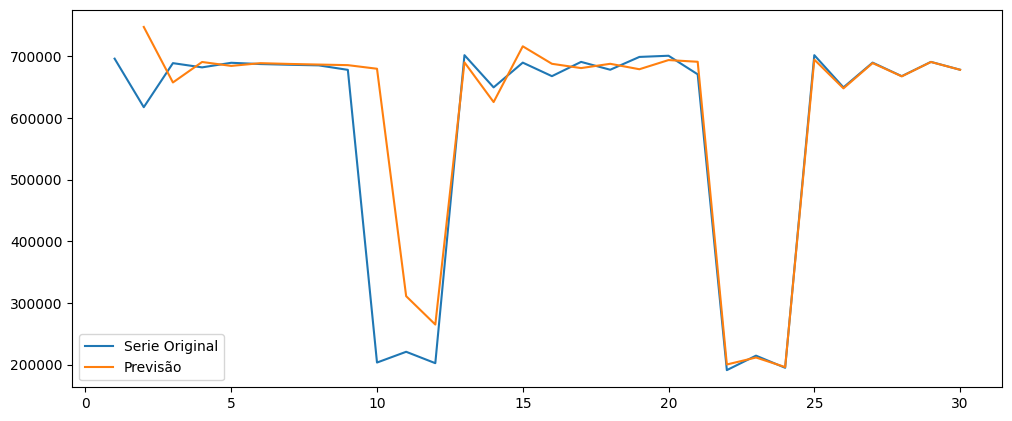

In [27]:
# Dados originais X Previsão 
plt.figure(figsize=(12,5), dpi=100);
plt.plot(train_Sarima,label='Serie Original')
plt.plot(modelo_sarima_v2_fit.fittedvalues[1:],label='Previsão')
plt.legend();

**Os dados de previsão conseguiu acompanhar de forma adequada os dados da série original**

### Previsão dos Dados de teste

In [28]:
#Criar as previsõe(Eixo y) e o nivel de confiança
predicoes = modelo_p0_P1.get_prediction(start=-7) # Somente os ultimos 7 periodos
predicao_media =  predicoes.predicted_mean #Plotar a media
int_conf = predicoes.conf_int()
limite_baixo = int_conf.iloc[:,0]#Plotar intervalo de conf da banda de baixo
limite_acima = int_conf.iloc[:,1]#Plotar intervalo de conf da banda acima

**Criamos as previsões e o nivel de confiança dos dados de teste**

In [29]:
#Criar os meses (Eixo X)
datas_previstas = np.asanyarray(predicao_media.index) #Indice das  datas previstas
datas = np.asanyarray(train_Sarima.index) #Todas as datas

**Criar os meses do eixo X do plot**

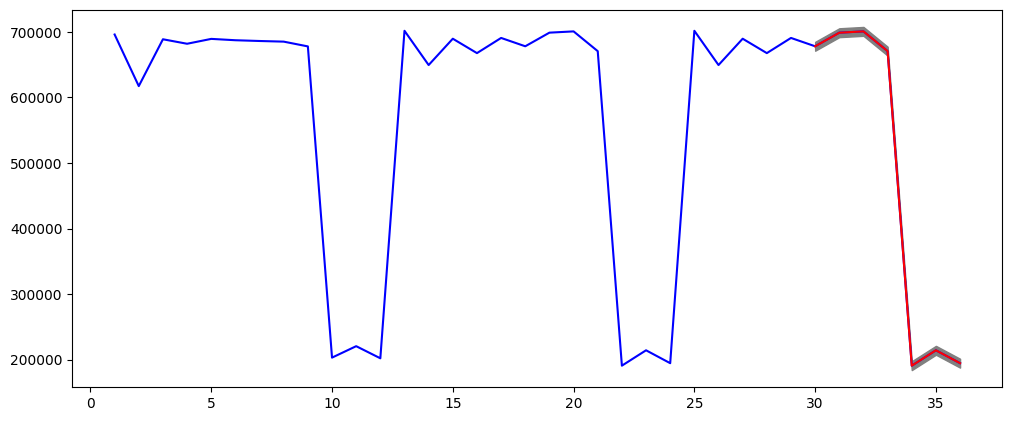

In [30]:
#Plot das Previsão com os dados de treino
plt.figure(figsize=(12,5), dpi=100)
plt.plot(total['Product Price'],color='b',label='Serie_temporal')
plt.plot(datas_previstas,predicao_media.values,label='Previsão',color='r');
plt.fill_between(datas_previstas,limite_baixo,limite_acima,color='grey');

**Visualmente podemos perceber que a linha da previsão anda praticamente junta com a serie original e o intervalo de confiança segue o mesmo padrão**

# Forecast (Plot)

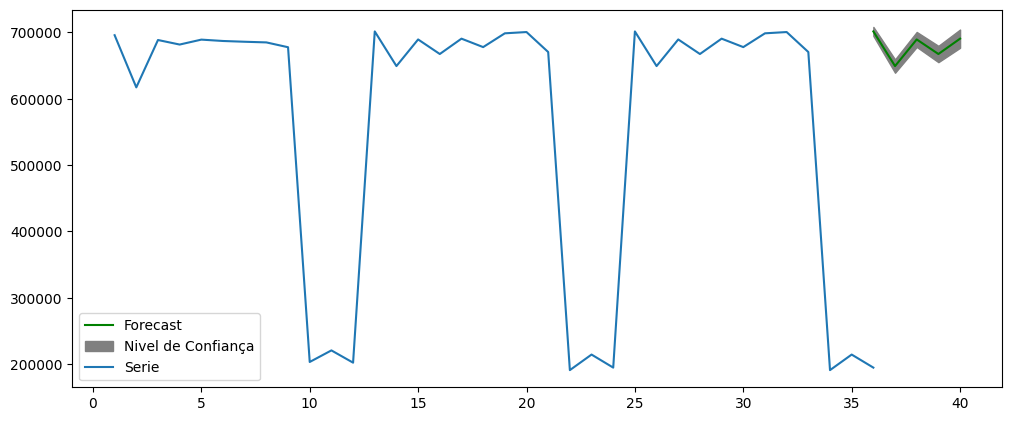

In [31]:
#Forecast para 5 periodos
import warnings
warnings.filterwarnings('ignore')
forecast = modelo_p0_P1.get_forecast(steps=5)  
forecast_medio_Arima_1 =  forecast.predicted_mean #Plotar a media


int_conf_forecast = forecast.conf_int() # Intervalo de confiança
limite_baixo_f = int_conf_forecast.iloc[:,0]#Plotar intervalo de conf da banda de baixo
limite_acima_f = int_conf_forecast.iloc[:,1]#Plotar intervalo de conf da banda acima

datas_forecast = np.asanyarray(forecast_medio_Arima_1.index) #Indice das  datas previstas
predicoes = modelo_p0_P1.get_prediction(start=-12) # Somente os ultimos 12 periodos
predicao_media =  predicoes.predicted_mean #Plotar a media
pred_dates = np.asanyarray(predicao_media.index) #Todas as datas
datas = np.asarray(total.index)

#Previsao com os dados de Teste
plt.figure(figsize=(12,5), dpi=100)
plt.plot(datas_forecast,forecast_medio_Arima_1.values,label='Forecast',color='green');
plt.fill_between(datas_forecast,limite_baixo_f,limite_acima_f,color='grey',label='Nivel de Confiança')



plt.plot(datas,total['Product Price'].values,label='Serie')
plt.legend()
plt.show()

**Não podemos afirmar que a previsão está ou não correta, porém o padrão dos dados foi detectado corretamente pelo modelo**

# Forecast (Dados)

In [32]:
#Valores
forcast = pd.DataFrame(forecast_medio_Arima_1)
forcast

,predicted_mean
36,701607.325061
37,649376.496436
38,689515.721174
39,667560.236699
40,690708.689558


**Dados com as previsão de vendas com o modelo Sarimax para os proximos 5 meses**

## $$2°- Objetivo:$$

## $$Verificar~ o ~desempenho~ da ~entrega ~dos~ produtos$$

# Base de Dados 

In [33]:
# Carrega os dados
dados = pd.read_csv("dados/DataCoSupplyChainDataset.csv", encoding = 'latin1')
dados.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


In [34]:
# Selecionar as variáveis para o 2° objetivo

entrega = dados[['order date (DateOrders)','shipping date (DateOrders)','Type','Days for shipping (real)',
                 'Late_delivery_risk','Customer City',
                 'Customer Country','Latitude','Longitude','Order City','Order Country']]
entrega.head(20)

,order date (DateOrders),shipping date (DateOrders),Type,Days for shipping (real),Late_delivery_risk,Customer City,Customer Country,Latitude,Longitude,Order City,Order Country
0,1/31/2018 22:56,2/3/2018 22:56,DEBIT,3,0,Caguas,Puerto Rico,18.251453,-66.037056,Bekasi,Indonesia
1,1/13/2018 12:27,1/18/2018 12:27,TRANSFER,5,1,Caguas,Puerto Rico,18.279451,-66.037064,Bikaner,India
2,1/13/2018 12:06,1/17/2018 12:06,CASH,4,0,San Jose,EE. UU.,37.292233,-121.881279,Bikaner,India
3,1/13/2018 11:45,1/16/2018 11:45,DEBIT,3,0,Los Angeles,EE. UU.,34.125946,-118.291016,Townsville,Australia
4,1/13/2018 11:24,1/15/2018 11:24,PAYMENT,2,0,Caguas,Puerto Rico,18.253769,-66.037048,Townsville,Australia
...,...,...,...,...,...,...,...,...,...,...,...
15,1/13/2018 7:33,1/15/2018 7:33,DEBIT,2,1,Caguas,Puerto Rico,18.284050,-66.037056,Sangli,India
16,1/13/2018 7:12,1/18/2018 7:12,PAYMENT,5,1,Canovanas,Puerto Rico,18.395790,-65.872887,Seúl,Corea del Sur
17,1/13/2018 6:51,1/15/2018 6:51,CASH,2,1,Paramount,EE. UU.,33.898693,-118.174560,Jabalpur,India
18,1/13/2018 6:30,1/15/2018 6:30,DEBIT,2,1,Caguas,Puerto Rico,18.233778,-66.037064,Jabalpur,India


# Dicionário de Dados das variáveis Selecionadas

### **$$Variáveis:$$**

- **order date (DateOrders):** Data que foi processado o pedido


- **shipping date (DateOrders):** Data que foi entregue o pedido


- **Type:** Tipo de transação realizada

    
- **Days for shipping (real):** Dias para entrega do produto

    
- **Late_delivery_risk:** Variável categórica que indica se o envio pode atrasar(1) ou não(0)


- **Customer City:** Cidade onde o cliente fez a compra

    
- **Customer Country:** País onde o cliente fez a compra

    
- **Latitude:** Latitude correspondente à localização da loja


- **Longitude:** Longitude correspondente à localização da loja

    
- **Order City:** Cidade de destino do pedido

    
- **Order Country:** País de destino do pedido

# Análise Exploratória

In [35]:
# Tipos de dados das colunas
tipo = entrega.dtypes
tipo = tipo.to_frame()
tipo.columns = ['Type']

# Verifica o total de valores únicos por coluna
tipo['Unique']= dados.nunique()

pd.set_option('display.min_rows', 20)
tipo.head(11)

,Type,Unique
order date (DateOrders),object,65752
shipping date (DateOrders),object,63701
Type,object,4
Days for shipping (real),int64,7
Late_delivery_risk,int64,2
Customer City,object,563
Customer Country,object,2
Latitude,float64,11250
Longitude,float64,4487
Order City,object,3597


**Os types estão de acordo com cada variável**

In [36]:
# Verificar se existe valores nulos
entrega.isnull().sum()

order date (DateOrders)       0
shipping date (DateOrders)    0
Type                          0
Days for shipping (real)      0
Late_delivery_risk            0
Customer City                 0
Customer Country              0
Latitude                      0
Longitude                     0
Order City                    0
Order Country                 0
dtype: int64

In [37]:
#Verificar todos os dados preenchidos de cada coluna

for i in entrega.columns:
    print(f'\nColuna: {i}, {entrega[i].unique()}')


Coluna: order date (DateOrders), ['1/31/2018 22:56' '1/13/2018 12:27' '1/13/2018 12:06' ...
 '1/21/2016 2:47' '1/20/2016 7:10' '1/17/2016 5:56']

Coluna: shipping date (DateOrders), ['2/3/2018 22:56' '1/18/2018 12:27' '1/17/2018 12:06' ... '1/25/2016 2:47'
 '1/23/2016 7:10' '1/21/2016 5:56']

Coluna: Type, ['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']

Coluna: Days for shipping (real), [3 5 4 2 6 0 1]

Coluna: Late_delivery_risk, [0 1]

Coluna: Customer City, ['Caguas' 'San Jose' 'Los Angeles' 'Tonawanda' 'Miami' 'San Ramon'
 'Freeport' 'Salinas' 'Peabody' 'Canovanas' 'Paramount' 'Mount Prospect'
 'Long Beach' 'Rancho Cordova' 'Billings' 'Wilkes Barre' 'Roseville'
 'Bellflower' 'Wheaton' 'Detroit' 'Dallas' 'Carlisle' 'Newark'
 'Panorama City' 'Atlanta' 'Fremont' 'Rochester' 'Bayamon' 'Guayama'
 'Juana Diaz' 'Fort Washington' 'Bakersfield' 'Corona' 'Cincinnati'
 'Germantown' 'Carrollton' 'Houston' 'Ewa Beach' 'Lakewood' 'Rome' 'Vista'
 'Fort Worth' 'Fond Du Lac' 'Philadelphia' 'Ontario' 'Ovied

**Valores dos dados coerente com cada variável**

## Análises univariadas

**Variável Target = 'Days for shipping (real)'**

In [38]:
#Verificar a média do prazo de entrega dos produtos
entrega['Days for shipping (real)'].min()

0

**Prazo minimo de entrega dos produtos**

In [39]:
#Verificar a média do prazo de entrega dos produtos
entrega['Days for shipping (real)'].max()

6

**Prazo maximo de entrega dos produtos**

In [40]:
#Verificar a média do prazo de entrega dos produtos
entrega['Days for shipping (real)'].mean()

3.4976539865609713

**A média de prazo de entrega é de 3 dias, vamos classificar em mais e menos de 3 dias no prazo da entrega e verificar o motivo na diferença nos prazos**

In [41]:
#Filtro do prazo de entrega dos produtos
atraso = entrega[entrega['Days for shipping (real)']>3]

at = len(atraso)

porcent = round(len(atraso)/len(entrega)*100,2)

print(f'Numero de dados de atrasos: {at}')
print(f'Porcentagem de dados de atrasos: {porcent}%')

Numero de dados de atrasos: 85399
Porcentagem de dados de atrasos: 47.31%


**47% dos dados tem entraga consideradas atrasadas**

In [42]:
#Prazo para entrega dos produtos em atraso
atraso['Days for shipping (real)'].unique()

array([5, 4, 6], dtype=int64)

**Dias de entregas considerados atrasados**

## Análise dos dados X Variável Target

In [43]:
# Criar a variável Target 
entrega['Target'] = np.where((entrega['Days for shipping (real)'] > 3), 1, 0)
entrega.head()

,order date (DateOrders),shipping date (DateOrders),Type,Days for shipping (real),Late_delivery_risk,Customer City,Customer Country,Latitude,Longitude,Order City,Order Country,Target
0,1/31/2018 22:56,2/3/2018 22:56,DEBIT,3,0,Caguas,Puerto Rico,18.251453,-66.037056,Bekasi,Indonesia,0
1,1/13/2018 12:27,1/18/2018 12:27,TRANSFER,5,1,Caguas,Puerto Rico,18.279451,-66.037064,Bikaner,India,1
2,1/13/2018 12:06,1/17/2018 12:06,CASH,4,0,San Jose,EE. UU.,37.292233,-121.881279,Bikaner,India,1
3,1/13/2018 11:45,1/16/2018 11:45,DEBIT,3,0,Los Angeles,EE. UU.,34.125946,-118.291016,Townsville,Australia,0
4,1/13/2018 11:24,1/15/2018 11:24,PAYMENT,2,0,Caguas,Puerto Rico,18.253769,-66.037048,Townsville,Australia,0


**Dados acima de 3 dias no prazo de entrega (classe 1), dados abaixo do prazo de entrega (classe 0)**

In [44]:
#Selecionar as variáveis categoricas
var_cat = entrega.select_dtypes(['object']).columns
var_cat = entrega[var_cat]

#Adicionar a variavel target para analise
var_cat['Target'] = entrega['Target']

var_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   order date (DateOrders)     180519 non-null  object
 1   shipping date (DateOrders)  180519 non-null  object
 2   Type                        180519 non-null  object
 3   Customer City               180519 non-null  object
 4   Customer Country            180519 non-null  object
 5   Order City                  180519 non-null  object
 6   Order Country               180519 non-null  object
 7   Target                      180519 non-null  int32 
dtypes: int32(1), object(7)
memory usage: 10.3+ MB


**Vamos considerar como relevantes as variáveis das quais as categorias com as probabilidade da classe da variável target, seja maior que 50%**

### type

In [45]:
#Meio de pagamento dos pedidos
type_ = pd.crosstab(entrega['Target'],entrega.Type)
type_/type_.aggregate(np.sum)

Type,CASH,DEBIT,PAYMENT,TRANSFER
Target,,,,
0,0.534054,0.528162,0.51825,0.529659
1,0.465946,0.471838,0.48175,0.470341


**A forma de pagamento não influencia no prazo da entrega dos produtos**

### Late_delivery_risk

In [46]:
#Risco de atraso do pedido
Late_delivery_risk = pd.crosstab(entrega['Target'],entrega.Late_delivery_risk)
Late_delivery_risk/Late_delivery_risk.aggregate(np.sum)

Late_delivery_risk,0,1
Target,,
0,0.703858,0.381159
1,0.296142,0.618841


**Note que o sistema da empresa tem um bom algoritimo que detecta se o pedido vai atrasar ou não, caso não detecta o risco de atraso, a prababilidade maior do pedido ser entregue em até 3 dias**

### Customer City

In [47]:
#Cidades que mais atrasam pedidos recebidos de clientes

#Somar o numero de linhas por Cidade
ped = entrega.groupby('Customer City').count()
ped = ped.reset_index()
ped['N_Pedidos'] = ped['Target']
ped = ped[['Customer City','N_Pedidos']]


#Separar os pedidos entre atraso 1 e não atraso 0 
Customer_City = pd.crosstab(entrega['Target'],entrega['Customer City']).T
#Resetar o index
Customer_City = Customer_City.reset_index()
#Unir o numero de pedidos com o dataframe
Customer_City = pd.merge(Customer_City,ped)
#Setar a variável Customer City com index
Customer_City = Customer_City.set_index('Customer City')

#Calcular a porcetagem de atrasos por cidade
Customer_City[0] = Customer_City[0]/Customer_City['N_Pedidos']
Customer_City[1] = Customer_City[1]/Customer_City['N_Pedidos']
city_atraso = Customer_City.sort_values(by=1,ascending=False)
city_atraso.head(20)

,0,1,N_Pedidos
Customer City,,,
Marion,0.117647,0.882353,34
Arlington Heights,0.272727,0.727273,66
Peoria,0.280000,0.720000,100
Norwalk,0.282609,0.717391,46
Henderson,0.293333,0.706667,75
Indio,0.297619,0.702381,84
Denton,0.318681,0.681319,91
Lynn,0.329545,0.670455,88
CA,0.333333,0.666667,3


**As 20 primeiras cidades que mais demoram para entregar os pedidos, note que há poucos pedidos nessas cidades**

In [48]:
#Numero de cidades que entregam os pedidos
len(dados['Customer City'].unique())

563

**563 cidades que entregam pedidos em todo os países**

In [49]:
#Cidades onde é recebido mais pedidos 
city_atraso.sort_values(by='N_Pedidos',ascending=False).head(10)

,0,1,N_Pedidos
Customer City,,,
Caguas,0.526808,0.473192,66770
Chicago,0.528185,0.471815,3885
Los Angeles,0.538777,0.461223,3417
Brooklyn,0.575615,0.424385,3412
New York,0.561674,0.438326,1816
Philadelphia,0.536462,0.463538,1577
Bronx,0.538667,0.461333,1500
San Diego,0.551844,0.448156,1437
Miami,0.542618,0.457382,1314


**Observe que as cidades onde é recebido mais pedidos, o prazo de entrega é equilibrado entre atraso e não atraso**

### Customer Country

In [50]:
#País que mais atrasa as entregas dos pedidos

#Somar o numero de linhas por País
ped_country = entrega.groupby('Customer Country').count()
ped_country = ped_country.reset_index()
ped_country['N_Pedidos'] = ped_country['Target']
ped_country = ped_country['N_Pedidos']
ped_country= ped_country.to_frame()

#Separar os pedidos entre atraso 1 e não atraso 0 
Customer_Country = pd.crosstab(entrega['Target'],entrega['Customer Country']).T
#Resetar o index
Customer_Country = Customer_Country.reset_index()
#Unir o numero de pedidos com o dataframe
Customer_Country['N_Pedidos'] = ped_country
#Setar a variável Customer Country com index
Customer_Country = Customer_Country.set_index('Customer Country')

#Calcular a porcetagem de atrasos por País
Customer_Country[0] = Customer_Country[0]/Customer_Country['N_Pedidos']
Customer_Country[1] = Customer_Country[1]/Customer_Country['N_Pedidos']
Country_atraso = Customer_Country.sort_values(by=1,ascending=False)
Country_atraso['Porcentagem_Pedidos'] = round(Country_atraso['N_Pedidos']/len(entrega)*100,2)
Country_atraso

Target,0,1,N_Pedidos,Porcentagem_Pedidos
Customer Country,,,,
EE. UU.,0.526884,0.473116,111146,61.57
Puerto Rico,0.526992,0.473008,69373,38.43


**Apesar dos EUA ter 61% dos pedidos, não há diferença no tempo de entrega dos produtos em relação a Puerto Rico**

### Order City

In [51]:
#Cidades que mais atrasam o recebimento dos produtos

#Somar o numero de linhas por Cidade
ped = entrega.groupby('Order City').count()
ped = ped.reset_index()
ped['N_Pedidos'] = ped['Target']
ped = ped[['Order City','N_Pedidos']]


#Separar os pedidos entre atraso 1 e não atraso 0 
Order_City = pd.crosstab(entrega['Target'],entrega['Order City']).T
#Resetar o index
Order_City = Order_City.reset_index()
#Unir o numero de pedidos com o dataframe
Order_City = pd.merge(Order_City,ped)
#Setar a variável Customer City com index
Order_City = Order_City.set_index('Order City')

#Calcular a porcetagem de atrasos por cidade
Order_City[0] = Order_City[0]/Order_City['N_Pedidos']
Order_City[1] = Order_City[1]/Order_City['N_Pedidos']
city_atraso = Order_City.sort_values(by=1,ascending=False)
city_atraso.head(20)

,0,1,N_Pedidos
Order City,,,
Felahiye,0.0,1.0,5
Sogamoso,0.0,1.0,4
South Shields,0.0,1.0,5
Sorriso,0.0,1.0,3
Dax,0.0,1.0,9
Daytona Beach,0.0,1.0,10
Deer Park,0.0,1.0,5
Sonipat,0.0,1.0,5
Den Helder,0.0,1.0,8


**Note que há pouco pedidos nas cidades onde atrasa a entrega do produto**

In [52]:
#Cidades onde é entregue mais pedidos 
city_atraso.sort_values(by='N_Pedidos',ascending=False).head(20)

,0,1,N_Pedidos
Order City,,,
Santo Domingo,0.538670,0.461330,2211
New York City,0.519074,0.480926,2202
Los Angeles,0.530081,0.469919,1845
Tegucigalpa,0.538418,0.461582,1783
Managua,0.560048,0.439952,1682
Mexico City,0.537062,0.462938,1484
Manila,0.533671,0.466329,1381
Philadelphia,0.553763,0.446237,1302
San Francisco,0.549730,0.450270,1297


**Não há muita diferença nas cidades onde entrega o maior volume de pedidos, tendo equilíbrio entre pedidos com atraso e sem atraso**

In [53]:
#Porcentagem de entregas na cidade de New York City feitas pelo EUA
ny = entrega[entrega['Order City']=='New York City']
ny1 = ny.groupby('Customer Country')['Order City'].count().to_frame()

round(ny1/len(ny),2)

,Order City
Customer Country,
EE. UU.,0.62
Puerto Rico,0.38


**Podemos observar que apenas 62% das entregas feitas na cidade de New York City, partiram do EUA**

### Order Country

In [54]:
#País que mais atrasa as entregas dos pedidos

#Somar o numero de linhas por País
ent_country = entrega.groupby('Order Country').count()
ent_country = ent_country.reset_index()
ent_country['N_Pedidos'] = ent_country['Target']
ent_country = ent_country['N_Pedidos']
ent_country= ent_country.to_frame()

#Separar os pedidos entre atraso 1 e não atraso 0 
order_Country = pd.crosstab(entrega['Target'],entrega['Order Country']).T
#Resetar o index
order_Country = order_Country.reset_index()
#Unir o numero de pedidos com o dataframe
order_Country['N_Pedidos'] = ent_country
#Setar a variável Customer Country com index
order_Country = order_Country.set_index('Order Country')

#Calcular a porcetagem de atrasos por País
order_Country[0] = order_Country[0]/order_Country['N_Pedidos']
order_Country[1] = order_Country[1]/order_Country['N_Pedidos']
Country_atraso = order_Country.sort_values(by=1,ascending=False)
Country_atraso['Porcentagem_Pedidos'] = round(Country_atraso['N_Pedidos']/len(entrega)*100,2)
Country_atraso.head(10)

Target,0,1,N_Pedidos,Porcentagem_Pedidos
Order Country,,,,
Kuwait,0.000000,1.000000,2,0.00
Sáhara Occidental,0.000000,1.000000,2,0.00
Eritrea,0.000000,1.000000,2,0.00
Laos,0.000000,1.000000,6,0.00
Luxemburgo,0.000000,1.000000,10,0.01
República de Gambia,0.000000,1.000000,5,0.00
Suazilandia,0.000000,1.000000,5,0.00
Bután,0.000000,1.000000,5,0.00
Montenegro,0.090909,0.909091,11,0.01


**Há poucos pedidos nos países onde atrasa os pedidos**

In [55]:
#País onde é entregue mais pedidos 
Country_atraso.sort_values(by='Porcentagem_Pedidos',ascending=False).head(10)

Target,0,1,N_Pedidos,Porcentagem_Pedidos
Order Country,,,,
Estados Unidos,0.527093,0.472907,24840,13.76
Francia,0.530177,0.469823,13222,7.32
México,0.521181,0.478819,13172,7.30
Alemania,0.523317,0.476683,9564,5.30
Australia,0.518418,0.481582,8497,4.71
Brasil,0.520596,0.479404,7987,4.42
Reino Unido,0.537798,0.462202,7302,4.05
China,0.521188,0.478812,5758,3.19
Italia,0.542794,0.457206,4989,2.76


**Há equilíbrio na entrega dos pedidos (entre atrasos e não atrasos), nos países onde há muitos pedidos**

In [56]:
#Numero de Países que recebem os pedidos
len(dados['Order Country'].unique())

164

**164 Países recebem produtos**

# Conclusão:

**Analisandos as variáveis, observamos que a empresa atua em 563 cidades tendo sede em 2 Países, a maioria das entregas que possuem atrasos são de países ou cidades distantes das sedes, com poucos pedidos entre elas, porém o problema maior está sendo na logistica da empresa, pois os clientes que fazem pedido de um produto onde possuem lojas na mesma cidade, muitas vezes o produto está sendo entregue de outra cidade ou até mesmo de outro país** 

## $$3°- Objetivo:$$  

## $$Analisar~ o~ controle~ de~ estoque~ da ~empresa$$


# Base de Dados 

In [57]:
# Carrega os dados
dados = pd.read_csv("dados/DataCoSupplyChainDataset.csv", encoding = 'latin1')
dados.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


In [58]:
# Selecionar as variáveis para o 3° objetivo

estoque = dados[['Customer Country','Customer City','Customer Id',
                'Customer State','Order City','Order Country',
                 'Order Item Id','Order Item Quantity','Product Card Id','Product Name','Latitude','Longitude']]
estoque.head(3)

,Customer Country,Customer City,Customer Id,Customer State,Order City,Order Country,Order Item Id,Order Item Quantity,Product Card Id,Product Name,Latitude,Longitude
0,Puerto Rico,Caguas,20755,PR,Bekasi,Indonesia,180517,1,1360,Smart watch,18.251453,-66.037056
1,Puerto Rico,Caguas,19492,PR,Bikaner,India,179254,1,1360,Smart watch,18.279451,-66.037064
2,EE. UU.,San Jose,19491,CA,Bikaner,India,179253,1,1360,Smart watch,37.292233,-121.881279


# Dicionário de Dados das variáveis Selecionadas

### **$$Variáveis:$$**

- **Customer Country:** País onde o cliente fez a compra


- **Customer City:** Cidade onde o cliente fez a compra

    
- **Customer Id:** ID do cliente

    
- **Customer State:** Estado ao qual pertence a loja onde a compra está registrada


- **Order City:** Cidade de destino do pedido


- **Order Country:** País de destino do pedido

    
- **Order Item Id:** Código do item do pedido

    
- **Order Item Quantity:** Quantidade de itens do pedido


- **Product Card Id:** código do produto


- **Product Name:** Nome do produto


- **Latitude:** Latitude correspondente à localização da loja



- **Longitude:** Longitude correspondente à localização da loja



# Análise Exploratória

In [59]:
# Tipos de dados das colunas
tipo = estoque.dtypes
tipo = tipo.to_frame()
tipo.columns = ['Type']

# Verifica o total de valores únicos por coluna
tipo['Unique']= estoque.nunique()

pd.set_option('display.min_rows', 20)
tipo.head(12)

,Type,Unique
Customer Country,object,2
Customer City,object,563
Customer Id,int64,20652
Customer State,object,46
Order City,object,3597
Order Country,object,164
Order Item Id,int64,180519
Order Item Quantity,int64,5
Product Card Id,int64,118
Product Name,object,118


**Os types estão de acordo com cada variável**

In [60]:
# Verificar se existe valores nulos
estoque.isnull().sum()

Customer Country       0
Customer City          0
Customer Id            0
Customer State         0
Order City             0
Order Country          0
Order Item Id          0
Order Item Quantity    0
Product Card Id        0
Product Name           0
Latitude               0
Longitude              0
dtype: int64

In [61]:
#Verificar todos os dados preenchidos de cada coluna

for i in estoque.columns:
    print(f'\nColuna: {i}, {estoque[i].unique()}')


Coluna: Customer Country, ['Puerto Rico' 'EE. UU.']

Coluna: Customer City, ['Caguas' 'San Jose' 'Los Angeles' 'Tonawanda' 'Miami' 'San Ramon'
 'Freeport' 'Salinas' 'Peabody' 'Canovanas' 'Paramount' 'Mount Prospect'
 'Long Beach' 'Rancho Cordova' 'Billings' 'Wilkes Barre' 'Roseville'
 'Bellflower' 'Wheaton' 'Detroit' 'Dallas' 'Carlisle' 'Newark'
 'Panorama City' 'Atlanta' 'Fremont' 'Rochester' 'Bayamon' 'Guayama'
 'Juana Diaz' 'Fort Washington' 'Bakersfield' 'Corona' 'Cincinnati'
 'Germantown' 'Carrollton' 'Houston' 'Ewa Beach' 'Lakewood' 'Rome' 'Vista'
 'Fort Worth' 'Fond Du Lac' 'Philadelphia' 'Ontario' 'Oviedo' 'Buffalo'
 'Honolulu' 'Oceanside' 'North Tonawanda' 'Clovis' 'Jamaica'
 'Granite City' 'Medford' 'Pomona' 'Tempe' 'Santa Ana' 'York' 'Aurora'
 'Simi Valley' 'Silver Spring' 'Saint Paul' 'San Antonio' 'Bronx'
 'Greenville' 'Morristown' 'San Diego' 'Oxnard' 'Albuquerque' 'Amarillo'
 'Lutz' 'Bend' 'East Brunswick' 'Lancaster' 'Hampton' 'New York'
 'Porterville' 'Portland' 'Stro

**Valores dos dados coerente com cada variável**

## Análises univariadas

In [62]:
#Porcentagem de pedidos por País
p_pr =len(estoque[estoque['Customer Country']=='Puerto Rico'])
p_eua = len(estoque)-p_pr

pr = p_pr/(p_pr+p_eua)
eua = p_eua/(p_pr+p_eua)

print(f'Porcentagem de pedidos nos Eua: {round(eua,2)*100}')
print(f'Porcentagem de pedidos em Porto Rico: {round(pr,2)*100}')

Porcentagem de pedidos nos Eua: 62.0
Porcentagem de pedidos em Porto Rico: 38.0


**Temos uma diferença significativa entre os pedidos feito através dos EUA e Porto Rico**

In [63]:
#Os 10 Produtos que mais vendem
pdp = estoque.pivot_table(values= 'Order Item Quantity', index = 'Product Name', aggfunc = np.sum)
pdp = pdp.sort_values('Order Item Quantity',ascending=False).head(10)
pdp

,Order Item Quantity
Product Name,
Perfect Fitness Perfect Rip Deck,73698
Nike Men's Dri-FIT Victory Golf Polo,62956
O'Brien Men's Neoprene Life Vest,57803
Nike Men's Free 5.0+ Running Shoe,36680
Under Armour Girls' Toddler Spine Surge Runni,31735
Nike Men's CJ Elite 2 TD Football Cleat,22246
Field & Stream Sportsman 16 Gun Fire Safe,17325
Pelican Sunstream 100 Kayak,15500
Diamondback Women's Serene Classic Comfort Bi,13729


**OS 10 primeiros produtos que mais vendem. É necessario ter um estoque maior desse produtos**

In [64]:
#Index dos produtos mais vendidos
o = pdp.index.values

#Filtrar na tabela original os produtos mais vendidos
dados_prod10 = pd.DataFrame()
for i in o:
    r =estoque[estoque['Product Name']==i]
    dados_prod10 = pd.concat([dados_prod10,r],axis=0)
dados_prod10.head(3)

,Customer Country,Customer City,Customer Id,Customer State,Order City,Order Country,Order Item Id,Order Item Quantity,Product Card Id,Product Name,Latitude,Longitude
48,Puerto Rico,Bayamon,9083,PR,Mirzapur,India,71956,2,365,Perfect Fitness Perfect Rip Deck,18.380119,-66.183128
57,Puerto Rico,Caguas,7864,PR,San Francisco,Estados Unidos,80250,2,365,Perfect Fitness Perfect Rip Deck,18.282795,-66.370560
58,Puerto Rico,Caguas,11169,PR,Overland Park,Estados Unidos,86866,2,365,Perfect Fitness Perfect Rip Deck,18.274662,-66.370583


**Tabela completa com os produtos mais vendidos**

In [65]:
#Verificar quantos estados de cada país saem mais pedidos
print('               Análise dos 10 Produtos mais vendidos\n')

qts_reg = len(dados_prod10['Customer State'].unique())
print(f'Quantidade de Estados que foram feito os pedidos: {qts_reg}')

reg_eua = dados_prod10[dados_prod10['Customer Country']=='EE. UU.']
reg_eua = len(reg_eua.groupby('Customer State').count())
print(f'Quantidade de Pedidos na Região nos EUA: {reg_eua}')


reg_pr = dados_prod10[dados_prod10['Customer Country']=='Puerto Rico']
reg_pr = len(reg_pr.groupby('Customer State').count())
print(f'Quantidade de Pedidos na Região de Porto Rico: {reg_pr}')



pais_tot = len(dados_prod10.groupby('Order Country').count())
print(f'Quantidade de Países que foram entregue os produtos: {pais_tot}')


city_tot = len(dados_prod10.groupby('Order City').count())
print(f'Quantidade de cidades que foram entregue os produtos: {city_tot}')

               Análise dos 10 Produtos mais vendidos

Quantidade de Estados que foram feito os pedidos: 44
Quantidade de Pedidos na Região nos EUA: 43
Quantidade de Pedidos na Região de Porto Rico: 1
Quantidade de Países que foram entregue os produtos: 163
Quantidade de cidades que foram entregue os produtos: 3575


**Analisando os 10 produtos mais vendidos, podemos verificar que a região dos EUA é praticamente unanime na venda dos produtos e a entrega é feita em 3575 regiões de 163 países**

In [66]:
#Verificar os países onde há mais entrega dos produtos
ent_pais = pd.DataFrame(dados_prod10.groupby('Order Country')['Order Item Quantity'].sum())
ent_pais= ent_pais.sort_values(by='Order Item Quantity',ascending=False)
ent_pais.head(10)

,Order Item Quantity
Order Country,
Estados Unidos,47824
México,25567
Francia,24274
Alemania,17231
Brasil,15337
Australia,13516
Reino Unido,13377
China,9038
Italia,8830


**OS 10 países onde há mais entregas de pedidos**

In [67]:
# Filtrar o País que mais vende produtos e que não é sede da empresa

mexico = dados_prod10[dados_prod10['Order Country']=='México']
mexico.head(5)

,Customer Country,Customer City,Customer Id,Customer State,Order City,Order Country,Order Item Id,Order Item Quantity,Product Card Id,Product Name,Latitude,Longitude
131,Puerto Rico,Caguas,10200,PR,Tlalpan,México,133251,5,365,Perfect Fitness Perfect Rip Deck,18.273315,-66.370605
136,Puerto Rico,Caguas,1473,PR,Córdoba,México,989,5,365,Perfect Fitness Perfect Rip Deck,18.292149,-66.370613
318,EE. UU.,West Covina,7454,CA,Guadalajara,México,137558,2,365,Perfect Fitness Perfect Rip Deck,34.067875,-117.927376
320,EE. UU.,Washington,8696,DC,Zacatecas,México,133933,2,365,Perfect Fitness Perfect Rip Deck,38.918262,-77.039467
321,EE. UU.,Valrico,2329,FL,Chihuahua,México,141623,2,365,Perfect Fitness Perfect Rip Deck,27.965654,-82.252808


**Filtro do País que mais compra os produtos da empresa e que não possuem lojas**

### Análise do controle de estoque para entrega no México

In [68]:
#Análise Geoespacial 
from shapely.geometry import Point
import geopandas as gpd

## Transformar as variáveis latitude e longitude em Geometry
geoo = mexico.copy()
# creating a geometry column 
geometry = [Point(xy) for xy in zip(geoo['Longitude'], geoo['Latitude'])]


#Criar Geodataframe 
ny_geo = gpd.GeoDataFrame(geoo, geometry=geometry)


from folium.plugins import FastMarkerCluster
from folium import Map
fmap = Map(location=[31.733,-106.483])
j =FastMarkerCluster(geoo[['Latitude','Longitude']])
fmap.add_child(j)
fmap

**Podemos observar que as regiões do 'Texas','New Mexico','Arizona' e 'Los Angeles', são onde a empresa tem as lojas e que fazem fronteira com o Mexico, portanto as entregas dos produtos fazem mais sentido por essas regiões** 

In [69]:
#Filtrar as regiões que fazem fronteira com o Mexico
sa = mexico[mexico["Customer State"]=='LA']
tx = mexico[mexico["Customer State"]=='TX']
az = mexico[mexico["Customer State"]=='AZ']
nm = mexico[mexico["Customer State"]=='NM']

front_MX = pd.concat([sa,tx])
front_MX = pd.concat([front_MX,az])
front_MX = pd.concat([front_MX,nm])
len(front_MX)

892

**892 entregas são feitas no Mexico pelas regiões dos EUA que fazem fronteira com o Mexico**

In [70]:
#Numero de entregas no Mexico por Porto Rico
len(mexico[mexico['Customer Country']=='Puerto Rico'])

4616

**4.616 entregas são feitas no Mexico pelo País Porto Rico**

In [71]:
#Numero de entregas no Mexico pelos EUA
len(mexico[mexico['Customer Country']=='EE. UU.'])

7405

**7.405 entregas são feitas no Mexico pelos EUA**

In [72]:
#Regiões que entregam produtos
len(mexico['Customer State'].unique())

43

**Quantidade de estados que entregam os pedidos no Mexico**

In [73]:
# Produto que mais é vendido no Mexico
order = pd.DataFrame(mexico.groupby('Product Card Id')['Order Item Quantity'].sum()).reset_index()
order.sort_values('Order Item Quantity',ascending=False)

,Product Card Id,Order Item Quantity
1,365,5626
3,502,4753
8,1014,4551
0,191,2701
4,627,2508
2,403,1728
7,1004,1323
9,1073,1207
5,957,1088
6,977,82


**Os produtos com Id '365', '502' e '1014' são os mais comprados pelos clientes do Mexico, é primordial que as regiões de 'Texas','New Mexico','Arizona' e 'Los Angeles' tenham os produtos em estoque para fazer as entregas**

# Conclusão:

**O controle do estoque está sendo feito de maneira errada, filtramos como exemplo as entregas que são feitas no Mexico, e verificamos um problema na logistica com os envios dos produtos que precisam ser feito nas regiões mais próxima do destino, como os envios estão praticamente sendo enviados de maneira aleatória, pode estar havendo um acumulo de produtos em estoque que nunca serão utilizados, e podem faltar produtos que poderiam ser entregues rapidamente em locais mais próximos.**

## $$4°- Objetivo:$$  

## $$Regras~ de~ Associação~ entre~ os~ produtos$$ 

# Base de Dados 

In [74]:
# Carrega os dados
dados = pd.read_csv("dados/DataCoSupplyChainDataset.csv", encoding = 'latin1')
dados.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


In [75]:
# Selecionar as variáveis para o 4° objetivo

reg_ass = dados[['Customer Fname','Product Name']]
reg_ass.head(5)

,Customer Fname,Product Name
0,Cally,Smart watch
1,Irene,Smart watch
2,Gillian,Smart watch
3,Tana,Smart watch
4,Orli,Smart watch


# Dicionário de Dados das variáveis Selecionadas

### **$$Variáveis:$$**

- **Customer Fname:** Nome do cliente


- **Product Name:** Nome do Produto

# Análise Exploratória

In [76]:
# Tipos de dados das colunas
tipo = reg_ass.dtypes
tipo = tipo.to_frame()
tipo.columns = ['Type']

# Verifica o total de valores únicos por coluna
tipo['Unique']= dados.nunique()

pd.set_option('display.min_rows', 20)
tipo.head(11)

,Type,Unique
Customer Fname,object,782
Product Name,object,118


In [77]:
# Verificar se existe valores nulos
reg_ass.isnull().sum()

Customer Fname    0
Product Name      0
dtype: int64

## Regras de Associação: 

- Criar Matriz Esparsa: Nome dos Clientes X Nome dos Produtos 

In [78]:
# Criar tabela 
col = dados[['Customer Fname', 'Product Name']]
col= pd.get_dummies(col,prefix=['Product Name'], columns = ['Product Name']).set_index('Customer Fname')

#Agrupas os nomes dos clientes 
col= col.groupby('Customer Fname').sum()

#Substituir a frequenia >= 1 pelo numero 1
col[col>1]=1
col

,Product Name_Adult dog supplies,Product Name_Baby sweater,Product Name_Bag Boy Beverage Holder,Product Name_Bag Boy M330 Push Cart,Product Name_Bowflex SelectTech 1090 Dumbbells,Product Name_Bridgestone e6 Straight Distance NFL Carolina,Product Name_Bridgestone e6 Straight Distance NFL San Dieg,Product Name_Bridgestone e6 Straight Distance NFL Tennesse,Product Name_Brooks Women's Ghost 6 Running Shoe,Product Name_Bushnell Pro X7 Jolt Slope Rangefinder,...,Product Name_Under Armour Women's Ignite Slide,Product Name_Under Armour Women's Micro G Skulpt Running S,Product Name_Web Camera,Product Name_Yakima DoubleDown Ace Hitch Mount 4-Bike Rack,Product Name_adidas Brazuca 2014 Official Match Ball,Product Name_adidas Kids' F5 Messi FG Soccer Cleat,Product Name_adidas Men's F10 Messi TRX FG Soccer Cleat,Product Name_adidas Men's Germany Black Crest Away Tee,Product Name_adidas Youth Germany Black/Red Away Match Soc,Product Name_insta-bed Neverflat Air Mattress
Customer Fname,,,,,,,,,,,,,,,,,,,,,
Aaron,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
Abigail,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abra,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adam,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Adara,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adele,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adena,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adrienne,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aiko,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Foi criado a matriz esparsa para encontrar associação entre produtos e clientes, sendo 1 quando há relação e 0 quando não há**

In [88]:
#Regras de associação: verificar o suporte acima de 30%
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori, association_rules

#Filtrar os produtos com suporte acima de 30%
frequent_itemsets = apriori(col, min_support =  0.30, use_colnames = True)
frequent_itemsets.head(5)

,support,itemsets
0,0.452685,(Product Name_Adult dog supplies)
1,0.512788,(Product Name_Children's heaters)
2,0.359335,(Product Name_DVDs )
3,0.413043,(Product Name_Dell Laptop)
4,0.515345,(Product Name_Fighting video games)


**Filtramos os itens com suporte acima de 30%**

In [87]:
#Criar as variáveis Confiança e lift
from mlxtend.frequent_patterns import association_rules

rules = round(association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5),4)
regras =round(rules.sort_values(by=['lift'], ascending = False).drop(['antecedent support', 'consequent support', 'leverage', 'conviction'], axis=1),4)

#Remover dados duplicados
regras = regras.drop_duplicates(subset=['support','lift'])

#Mostrar apenas as 10 melhores metricas de regra de associação
regras.head(10)

,antecedents,consequents,support,confidence,lift
59,"(Product Name_Web Camera, Product Name_Industrial consumer electronics)",(Product Name_Summer dresses),0.3005,0.9180,1.9560
67,(Product Name_Web Camera),"(Product Name_Summer dresses, Product Name_Toys )",0.3235,0.6606,1.9275
61,(Product Name_Web Camera),"(Product Name_Summer dresses, Product Name_Industrial consumer electronics)",0.3005,0.6136,1.9116
58,"(Product Name_Web Camera, Product Name_Summer dresses)",(Product Name_Industrial consumer electronics),0.3005,0.7860,1.9087
68,(Product Name_Summer dresses),"(Product Name_Web Camera, Product Name_Toys )",0.3235,0.6894,1.9049
6,(Product Name_DVDs ),(Product Name_Children's heaters),0.3478,0.9680,1.8877
42,(Product Name_Rock music),(Product Name_Porcelain crafts),0.3504,0.8431,1.8837
2,(Product Name_Dell Laptop),(Product Name_Adult dog supplies),0.3299,0.7988,1.7645
69,(Product Name_Toys ),"(Product Name_Web Camera, Product Name_Summer dresses)",0.3235,0.6729,1.7598
39,(Product Name_Lawn mower),(Product Name_Sports Books ),0.3056,0.6771,1.7302


**Filtramos as 10 principais regras de associação baseada na metrica lift**

# Conclusão:

**Observe que as 3 metricas tem um valor alto, isso é importante pois dá mais sustentação ao resultado final, sendo assim essas regras podem ser levadas a equipe de marketing para fazer campanhas para alavancar ainda mais as vendas**

# Conclusão Geral: 

**Supply Chain Analytics é a ferramenta de controle de dados que utiliza as técnicas e conceitos logísticos somados a tecnologia Data Analytics e Big Data**

**Tivemos 4 objetivos diferentes nesse mini-projeto, o qual unificava em uma só razão, resolver o problema de negócio da empresa, quanto mais problema temos que resolver, mais dados serão necessários para chegar ao resultado final, foi isso que tratamos em cada um dos objetivos, separamos as variáveis necessárias para cada problema, tratamos os dados, tiramos insights valiosos nas análises exploratórias, tudo para chegar ao melhor resultado possível**
